In [1]:
import pandas as pd
import numpy as np
import io

In [2]:
with open('spam.csv', 'r', encoding='utf-8', errors='replace') as file:
    lines = file.readlines()

# Now, you can join the lines and use pd.read_csv on the content
content = ''.join(lines)
df = pd.read_csv(io.StringIO(content))


In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2562,ham,"Yeah I am, so I'll leave maybe 7ish?",NaN,NaN,NaN
608,ham,Neva mind it's ok..,NaN,NaN,NaN
1708,ham,How's my loverboy doing ? What does he do that...,NaN,NaN,NaN
666,ham,Carlos'll be here in a minute if you still nee...,NaN,NaN,NaN
181,ham,Lol no. U can trust me.,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# 1)Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#drop last theee columns (unnamed)

df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [7]:
df.sample(5)

,v1,v2
1265,ham,Im in inperialmusic listening2the weirdest tra...
3094,ham,Olol i printed out a forum post by a guy with ...
1057,ham,Ard 515 like dat. Y?
3064,ham,"Sounds good, keep me posted"
2383,ham,Your pussy is perfect!


In [8]:
#rename the columns
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.sample(5)

,target,text
533,ham,I'll be late...
1406,spam,"URGENT, IMPORTANT INFORMATION FOR O2 USER. TOD..."
716,spam,+449071512431 URGENT! This is the 2nd attempt ...
3342,ham,"I haven't forgotten you, i might have a couple..."
4607,ham,We live in the next &lt;#&gt; mins


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [10]:
#assign ham=1 and spam=0
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
#check for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
#check for duplicate values
df.duplicated().sum()
#and delete them
df = df.drop_duplicates(keep='first')

In [14]:
df.shape

(5169, 2)

# # exploratory data analysis

In [15]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
#check for number of hams and spams
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

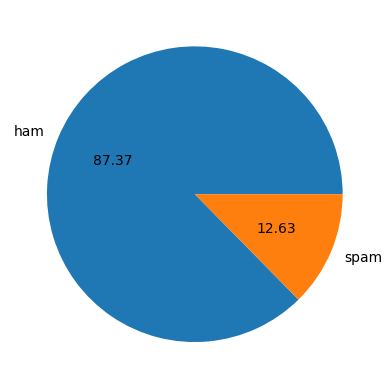

In [17]:
import matplotlib.pyplot as plt
#autopct for viewing two values after decimal
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [22]:
import nltk
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

['C:\\Users\\VIPER_PC/nltk_data', 'C:\\Users\\VIPER_PC\\AppData\\Local\\Programs\\Python\\Python311\\nltk_data', 'C:\\Users\\VIPER_PC\\AppData\\Local\\Programs\\Python\\Python311\\share\\nltk_data', 'C:\\Users\\VIPER_PC\\AppData\\Local\\Programs\\Python\\Python311\\lib\\nltk_data', 'C:\\Users\\VIPER_PC\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']
